In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.4 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=465f924d48f3f2845ed6775ab26d83cd233652038c245717c3fa54884d765006
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2883584/45929032 bytes (6.3%)6103040/45929032 bytes (13.3%)9445376/45929032 bytes (20.6%)12812288/45929032 bytes (27.9%)15974400/45929032 bytes (34.8%)19243008/45929032 bytes (41.9%)22519808/45929032 bytes (49.0%)25608192/45929032 bytes (55.8%)28819456/45929032 bytes (62.7%)31383552/45929032 bytes (68.3%)34701312/45929032 bytes (75.6%)38019072/45929032 bytes (82.8%)

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

EGLError: ignored

In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(0,1,1)   #openGL Color Codes
gl.glPointSize(5)

import random
def point(count):
 for i in range(0,count):
   start = random.uniform(0,1)
   end = random.uniform(0,1)
   gl.glBegin(gl.GL_POINTS)
   gl.glVertex2f(start,end)
   gl.glEnd()
point(50)

#gl.glBegin(gl.GL_LINES)
#gl.glVertex2f(0,-1)
#gl.glVertex2f(0,1)
#gl.glVertex2f(1,0)
#gl.glVertex2f(-1,0)
#gl.glEnd()

#gl.glColor3f(.5,0,0)
#gl.glBegin(gl.GL_POINTS)
#gl.glVertex2f(.75,.80 )
#gl.glVertex2f(.1, 0)
#gl.glEnd()


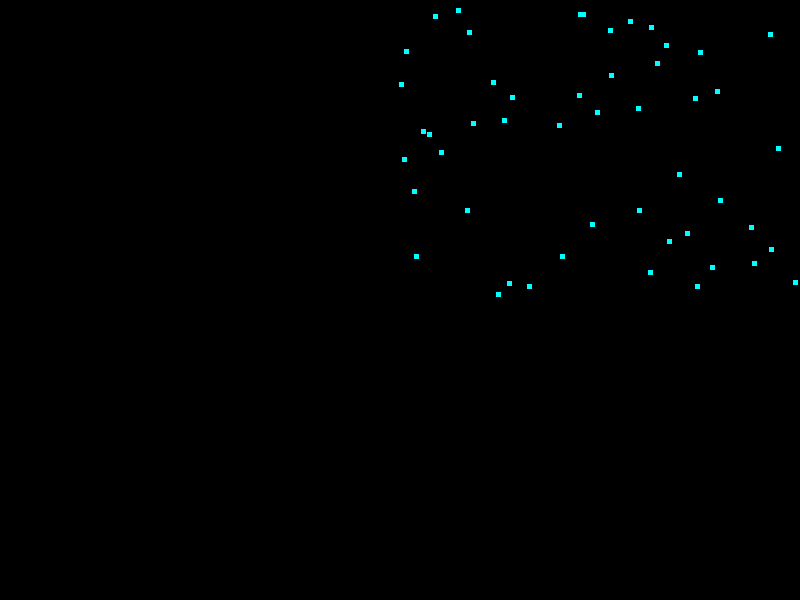

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(0.184314,0.184314,0.309804)
gl.glPointSize(5)

gl.glBegin(gl.GL_TRIANGLES)   #	Treats each triplet of vertices as an independent triangle. Vertices 3n - 2, 3n - 1, and 3n define triangle n. N/3 triangles are drawn.
gl.glVertex2f(0.2,0.5)
gl.glVertex2f(0.5,0.5)
gl.glVertex2f(0.35,0.7)
gl.glEnd()


gl.glColor3f(0.184314,0.184314,0.309804)
gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0.2,0.5)   #0.2 Refers to left straight lines position and 0.5 refers to the height of this line (upper corner)
gl.glVertex2f(0.2,0.1)  #0.2 refers to the left straight line (lower corner) amd 0.01 refers to this lines height (axis wise)
gl.glVertex2f(0.5,0.5)   #these refers to the right straight line
gl.glVertex2f(0.5,0.1)  #0.5 refers to the angle and 0.01 refers to the height of the right straight line
gl.glVertex2f(0.2,0.1)  #Fixing the Ground Line
gl.glVertex2f(0.5,0.1)  #Ground size 0.5 and angle 0.01
gl.glVertex2f(0.3,0.3)   #door left line
gl.glVertex2f(0.3,0.1)  #door left line
gl.glVertex2f(0.4,0.3)   #door right line
gl.glVertex2f(0.4,0.1)  #door right line
gl.glVertex2f(0.3,0.3)   #door upper line
gl.glVertex2f(0.4,0.3)   #door upper line 
gl.glEnd()


#KNOB
gl.glColor3f(0.5,0,0)
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(0.38,0.2)
gl.glEnd()

#WIndows
gl.glColor3f(0.309804,0.184314,0.309804)
def wnd(x1,x2,x3,x4,y1,y2,y3,y4):     #For Windows
  gl.glBegin(gl.GL_LINES)
  gl.glVertex2f(x1,y1)
  gl.glVertex2f(x2,y2)
  gl.glVertex2f(x2,y2)
  gl.glVertex2f(x3,y3)
  gl.glVertex2f(x3,y3)
  gl.glVertex2f(x4,y4)
  gl.glVertex2f(x4,y4)
  gl.glVertex2f(x1,y1)
  gl.glEnd()
wnd(0.22,0.30,0.30,0.22,0.47,0.47,0.37,0.37)   # left square Window 
wnd(0.40,0.478,0.478,0.40,0.47,0.47,0.37,0.37)   # right square window


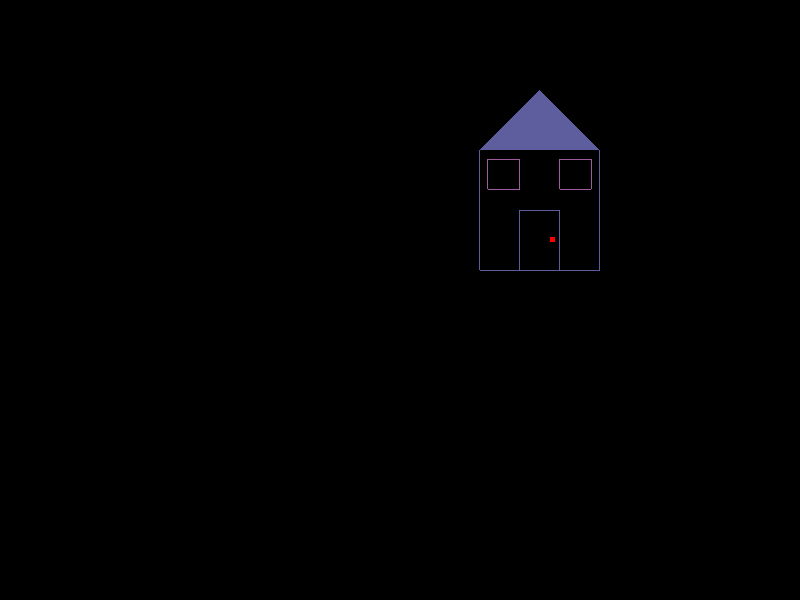

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)